<a href="https://colab.research.google.com/github/IndraWijaya2/VisiKomputer/blob/main/Jobsheet2VisIKomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

D1

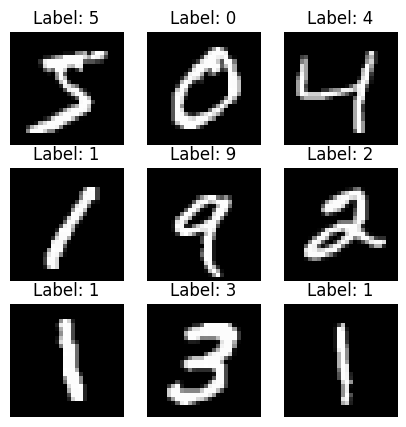

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()


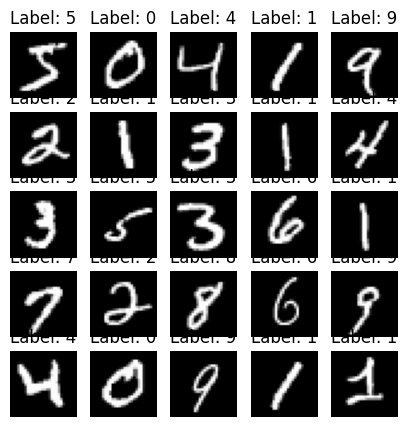

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()


D2

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9101


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9513


D3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.8952 - loss: 0.3577 - val_accuracy: 0.9828 - val_loss: 0.0693
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9820 - loss: 0.0616 - val_accuracy: 0.9860 - val_loss: 0.0502
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 20ms/step - accuracy: 0.9874 - loss: 0.0411 - val_accuracy: 0.9862 - val_loss: 0.0498
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.9920 - loss: 0.0278 - val_accuracy: 0.9853 - val_loss: 0.0476
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9943 - loss: 0.0183 - val_accuracy: 0.9872 - val_loss: 0.0512


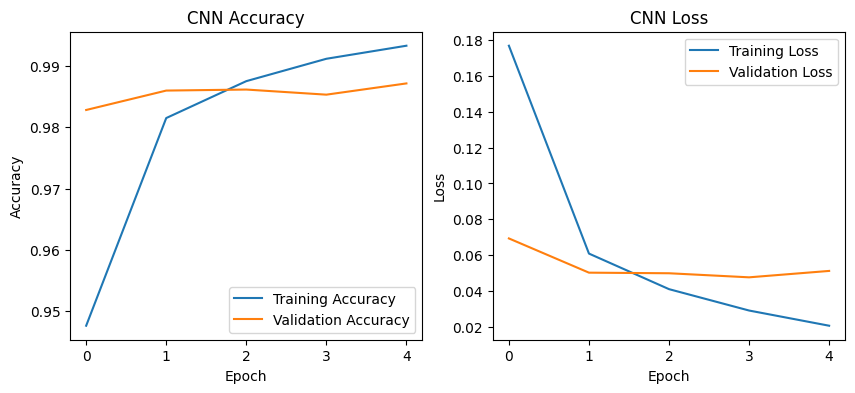

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# Plot history
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.8900 - loss: 0.3531 - val_accuracy: 0.9823 - val_loss: 0.0638
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9827 - loss: 0.0562 - val_accuracy: 0.9850 - val_loss: 0.0516
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9881 - loss: 0.0380 - val_accuracy: 0.9883 - val_loss: 0.0421
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9923 - loss: 0.0238 - val_accuracy: 0.9855 - val_loss: 0.0466
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9946 - loss: 0.0180 - val_accuracy: 0.9900 - val_loss: 0.0393


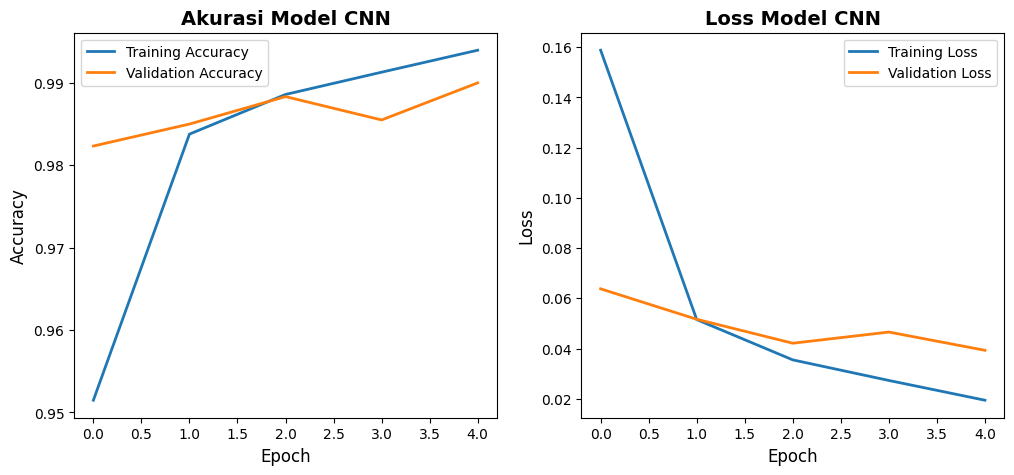


Akurasi pada data testing: 0.9901
Loss pada data testing: 0.0313


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    #tambahan layer Conv2D dan MaxPooling2D
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

plt.figure(figsize=(12, 5))

# Plot history
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Akurasi Model CNN', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Loss Model CNN', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()

plt.show()

#evaluasi model
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"\nAkurasi pada data testing: {test_acc:.4f}")
print(f"Loss pada data testing: {test_loss:.4f}")


D4

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 42ms/step - accuracy: 0.3636 - loss: 1.7522 - val_accuracy: 0.5546 - val_loss: 1.2512
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.5818 - loss: 1.1819 - val_accuracy: 0.6194 - val_loss: 1.0900
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.6532 - loss: 0.9990 - val_accuracy: 0.6696 - val_loss: 0.9785
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.6823 - loss: 0.9119 - val_accuracy: 0.6810 - val_loss: 0.9519
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.7038 - loss: 0.8460 - val_accuracy: 0.6832 - val_loss: 0.9208
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.7200 - loss: 0.7917 - val_accuracy: 0.6936 - val_loss: 0.9089
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.7452 - loss: 0.7350 - val_accuracy: 0.6604 - val_loss: 0.9878
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7542 -

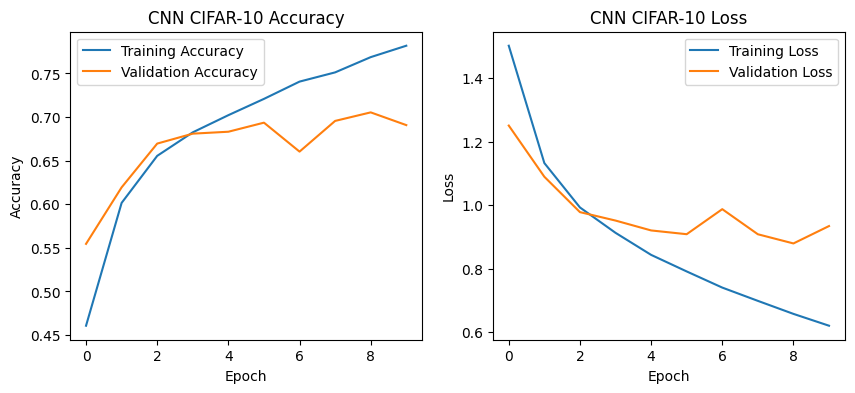

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.MaxPooling2D((2,2)),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Plot history
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 40ms/step - accuracy: 0.2694 - loss: 1.9449 - val_accuracy: 0.4916 - val_loss: 1.4192
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.4364 - loss: 1.5342 - val_accuracy: 0.5352 - val_loss: 1.2994
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.4982 - loss: 1.3885 - val_accuracy: 0.5998 - val_loss: 1.1574
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.5372 - loss: 1.2925 - val_accuracy: 0.6398 - val_loss: 1.0413
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5678 - loss: 1.2139 - val_accuracy: 0.6524 - val_loss: 1.0057
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.5868 - loss: 1.1629 - val_accuracy: 0.6552 - val_loss: 0.9809
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6056 - loss: 1.1091 - val_accuracy: 0.6672 - val_loss: 0.9658
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.6196 -

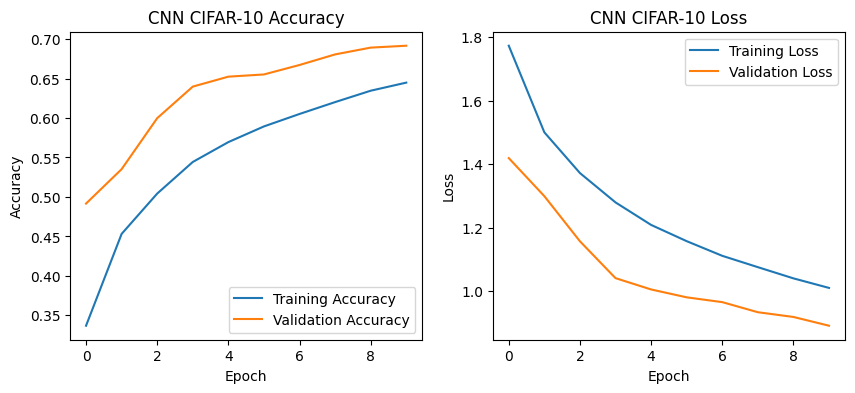

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Build model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Plot history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

D5

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 610s 433ms/step - accuracy: 0.4558 - loss: 1.5615 - val_accuracy: 0.5784 - val_loss: 1.2143
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 622s 433ms/step - accuracy: 0.5791 - loss: 1.2021 - val_accuracy: 0.5932 - val_loss: 1.1731
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 625s 435ms/step - accuracy: 0.6005 - loss: 1.1367 - val_accuracy: 0.5980 - val_loss: 1.1494
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 628s 446ms/step - accuracy: 0.6164 - loss: 1.1007 - val_accuracy: 0.6100 - val_loss: 1.1257
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 606s 431ms/step - accuracy: 0.6287 - loss: 1.0580 - val_accuracy: 0.6130 - val_loss: 1.1082


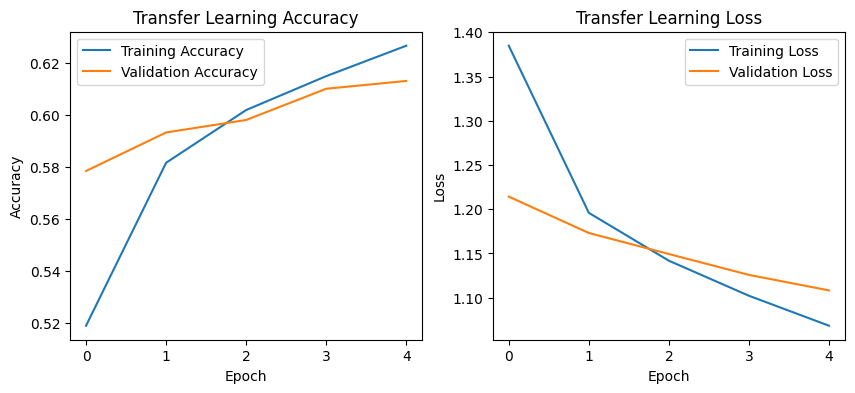

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Plot history
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 697s 494ms/step - accuracy: 0.5063 - loss: 1.3965 - val_accuracy: 0.5980 - val_loss: 1.1252
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 734s 488ms/step - accuracy: 0.6300 - loss: 1.0504 - val_accuracy: 0.6298 - val_loss: 1.0506
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 712s 467ms/step - accuracy: 0.6612 - loss: 0.9683 - val_accuracy: 0.6506 - val_loss: 0.9969
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 680s 483ms/step - accuracy: 0.6813 - loss: 0.9076 - val_accuracy: 0.6578 - val_loss: 0.9897
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 657s 466ms/step - accuracy: 0.6909 - loss: 0.8758 - val_accuracy: 0.6568 - val_loss: 0.9677


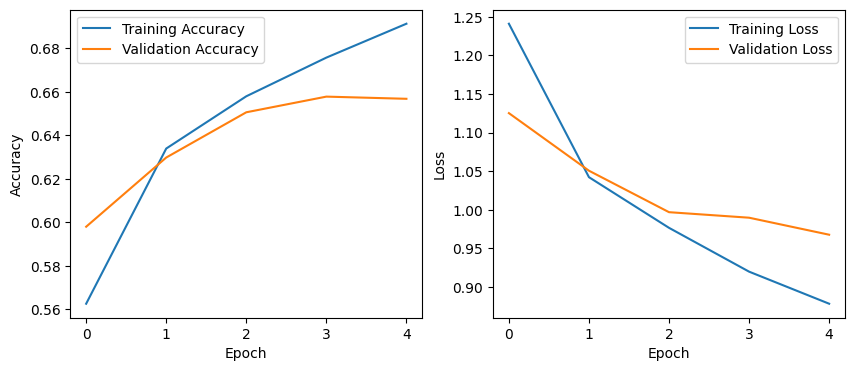

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Load base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

for layer in base_model.layers:
    layer.trainable = False

# Aktifkan 2 layer terakhir untuk fine-tuning
for layer in base_model.layers[-2:]:
    layer.trainable = True

# Tambahkan classifier di atasnya
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Plot history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 388ms/step
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      1000
           1       0.78      0.74      0.76      1000
           2       0.63      0.52      0.57      1000
           3       0.50      0.42      0.46      1000
           4       0.65      0.50      0.57      1000
           5       0.46      0.70      0.55      1000
           6       0.71      0.70      0.70      1000
           7       0.69      0.75      0.72      1000
           8       0.84      0.67      0.75      1000
           9       0.75      0.71      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



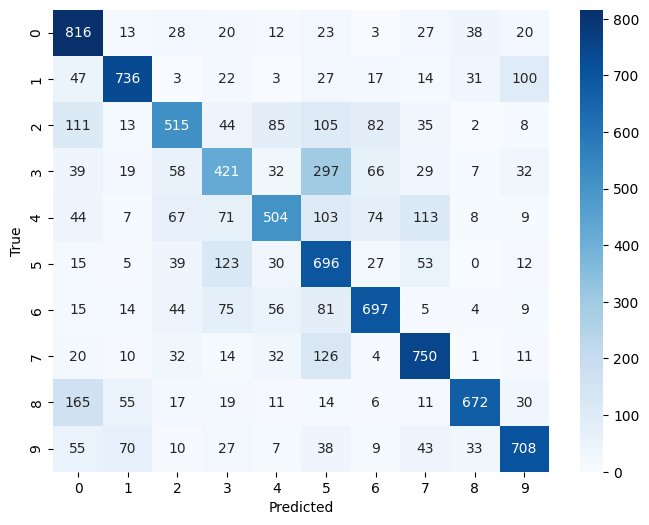

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
